<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CONTEXTO & OBJETIVOS</p>

<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:20px; border-radius:8px; font-size:15px; line-height:1.8;">

<p style="margin-bottom:18px;">
Para este trabajo práctico, se aborda una problemática basada en un escenario realista:
</p>

<blockquote style="margin-bottom:18px;">
El departamento de Recursos Humanos, al realizar el análisis anual, detectó un incremento inusual en la tasa de renuncias. De un total de <strong>1470 empleados</strong>, aproximadamente un <strong>16%</strong> ha dejado la empresa en los últimos meses.
</blockquote>

<p style="margin-bottom:0;">
Ante esta situación alarmante, se me asignó la siguiente tarea:
</p>

</div>

<br>

<div style="border-left:5px solid #49DE80; background-color:#eafaf0; padding:20px; border-radius:8px; font-size:15px; line-height:1.8;">

<p style="margin-bottom:18px;">
🎯 <strong>Objetivo 1:</strong><br>
<strong>Identificar patrones comunes entre los empleados que han renunciado.</strong><br>
- ¿Existe un perfil de empleado propenso a renunciar?<br>
- ¿Qué características comparten aquellos que se fueron?
</p>

<p style="margin-bottom:0;">
🎯 <strong>Objetivo 2:</strong><br>
<strong>Construir un modelo predictivo de clasificación.</strong><br>
- El propósito es anticipar qué empleados podrían renunciar próximamente.<br>
- La empresa <strong>no tiene restricciones presupuestarias</strong> para implementar medidas de retención, pero es crucial <strong>minimizar la pérdida de talento durante el próximo año</strong>.
</p>

</div>


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">METODOLOGÍA APLICADA</p>

<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:20px; border-radius:8px; font-size:15px; line-height:1.8;">

<p style="margin-bottom:18px;">
✔️ <strong>1. Análisis Exploratorio de Datos (EDA):</strong><br>
Se realizó un análisis tanto gráfico como analítico del dataset para identificar variables clave asociadas a las renuncias.
</p>

<p style="margin-bottom:18px;">
✔️ <strong>2. Limpieza y preparación de datos:</strong><br>
- Tratamiento de valores nulos<br>
- Codificación de variables categóricas<br>
- División del dataset en conjuntos de <strong>entrenamiento</strong> y <strong>prueba</strong>
</p>

<p style="margin-bottom:18px;">
✔️ <strong>3. Modelado predictivo:</strong><br>
Se implementaron diversos modelos de clasificación con el objetivo de <strong>maximizar la métrica más adecuada según el problema</strong> (por ejemplo: <code>recall</code>, <code>f1-score</code>, <code>ROC-AUC</code>), evaluando cuál ofrecía el mejor balance entre predicción y confianza.
</p>

<p style="margin-bottom:10px;">
✔️ <strong>4. Resultados:</strong><br>
- Se generó una <strong>lista de empleados con alta probabilidad de renunciar</strong>, permitiendo a la empresa priorizar estrategias de retención.<br>
- Se explicó <strong>la confianza del modelo y su interpretación</strong>, para facilitar su uso en decisiones estratégicas por parte de Recursos Humanos.
</p>

</div>


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">¿QUÉ MÉTRICA PRIORIZAR?</p>

<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:20px; border-radius:8px; font-size:15px; line-height:1.8;">

<p style="margin-bottom:18px;">
Como el objetivo del modelo es anticipar con la mayor certeza posible qué empleados podrían renunciar próximamente, para activar estrategias preventivas de retención, la métrica a priorizar es:
</p>

<p style="font-size:18px; color:#031913; font-weight:bold; margin-bottom:18px;">
<span style="background-color:#c8f7dc; padding:6px 12px; border-radius:6px;">
Minimizar Falsos Negativos → Maximizar Recall
</span>
</p>

<p style="margin-bottom:0;">
Es preferible <strong>detectar a todos los empleados que realmente se van</strong>, aunque se cometan algunos errores (falsos positivos), antes que <strong>pasar por alto a alguien que sí va a renunciar</strong>.
</p>

</div>


<a id="1"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">IMPORTACIÓN DE LIBRERÍAS</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.exceptions import FitFailedWarning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import scipy.stats as st
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_auc_score, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.pipeline import Pipeline, make_pipeline
from catboost import CatBoostClassifier

<a id="2"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CARGA DE DATOS</p>

Dataset: https://www.kaggle.com/datasets/miraclenifise/hr-employee-attrition-datasets

In [2]:
df_employees= pd.read_csv('/Users/lolonastri/Desktop/IA_UCEMA/trabajos_practicos/tp2_employees/Employee-Attrition.csv')
df_employees

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


<a id="3"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">COMPRENSIÓN DE LOS DATOS</p>

### <code>Validación de la data</code>




In [3]:
print("El dataset tiene" , df_employees.shape[0], "filas y", df_employees.shape[1], "columnas")

El dataset tiene 1470 filas y 35 columnas


In [4]:
df_employees.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
from funciones.funciones import validate_columns
validate_columns(df_employees)

,Unique_Values,Num_Unique_Values,Num_Null_Values,%_Null_Values,Sample_Unique_Values
Age,NaN,1470.0,0,0.0,"[41, 48, 36, 31, 46]"
Attrition,2,1470,0,0.0,"[No, Yes, No, Yes, No]"
BusinessTravel,3,1470,0,0.0,"[Travel_Rarely, Travel_Rarely, Travel_Frequent..."
DailyRate,NaN,1470.0,0,0.0,"[509, 626, 1213, 874, 150]"
Department,3,1470,0,0.0,"[Research & Development, Research & Developmen..."
DistanceFromHome,NaN,1470.0,0,0.0,"[7, 1, 2, 15, 2]"
Education,NaN,1470.0,0,0.0,"[2, 2, 1, 3, 4]"
EducationField,6,1470,0,0.0,"[Technical Degree, Life Sciences, Human Resour..."
EmployeeCount,NaN,1470.0,0,0.0,"[1, 1, 1, 1, 1]"
EmployeeNumber,NaN,1470.0,0,0.0,"[1085, 64, 1890, 1160, 1228]"


### <code>Veo los tipos de datos con dtypes</code>




In [6]:
df_employees.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

<a id="4"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">LIMPIEZA DE DATOS</p>

### <code>Columnas que no son necesarias</code>

<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:15px; border-radius:8px; font-size:15px;">

Se eliminan las siguientes columnas por no aportar valor predictivo al modelo o por contener información redundante:

<ul>
  <li><code>EmployeeCount</code>: Tiene un único valor para todos los registros, igual a la longitud del dataset.</li>
  <li><code>StandardHours</code>: Todos los empleados trabajan 80 horas, no hay variabilidad.</li>
  <li><code>Over18</code>: Todos son mayores de 18 años, ya que es un requisito legal para trabajar.</li>
  <li><code>EmployeeNumber</code>: Es un identificador único; no contiene patrones útiles para el análisis.</li>
</ul>

Estas columnas son removidas para reducir la dimensionalidad sin pérdida de información relevante.

</div>


In [7]:
df_employees = df_employees.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1)

In [8]:
#for col in df_employees.columns:
#    print(f"Value counts for {col}:")
#    print(df_employees[col].value_counts())
#    print("\n")


### <code>Valores outliers</code>




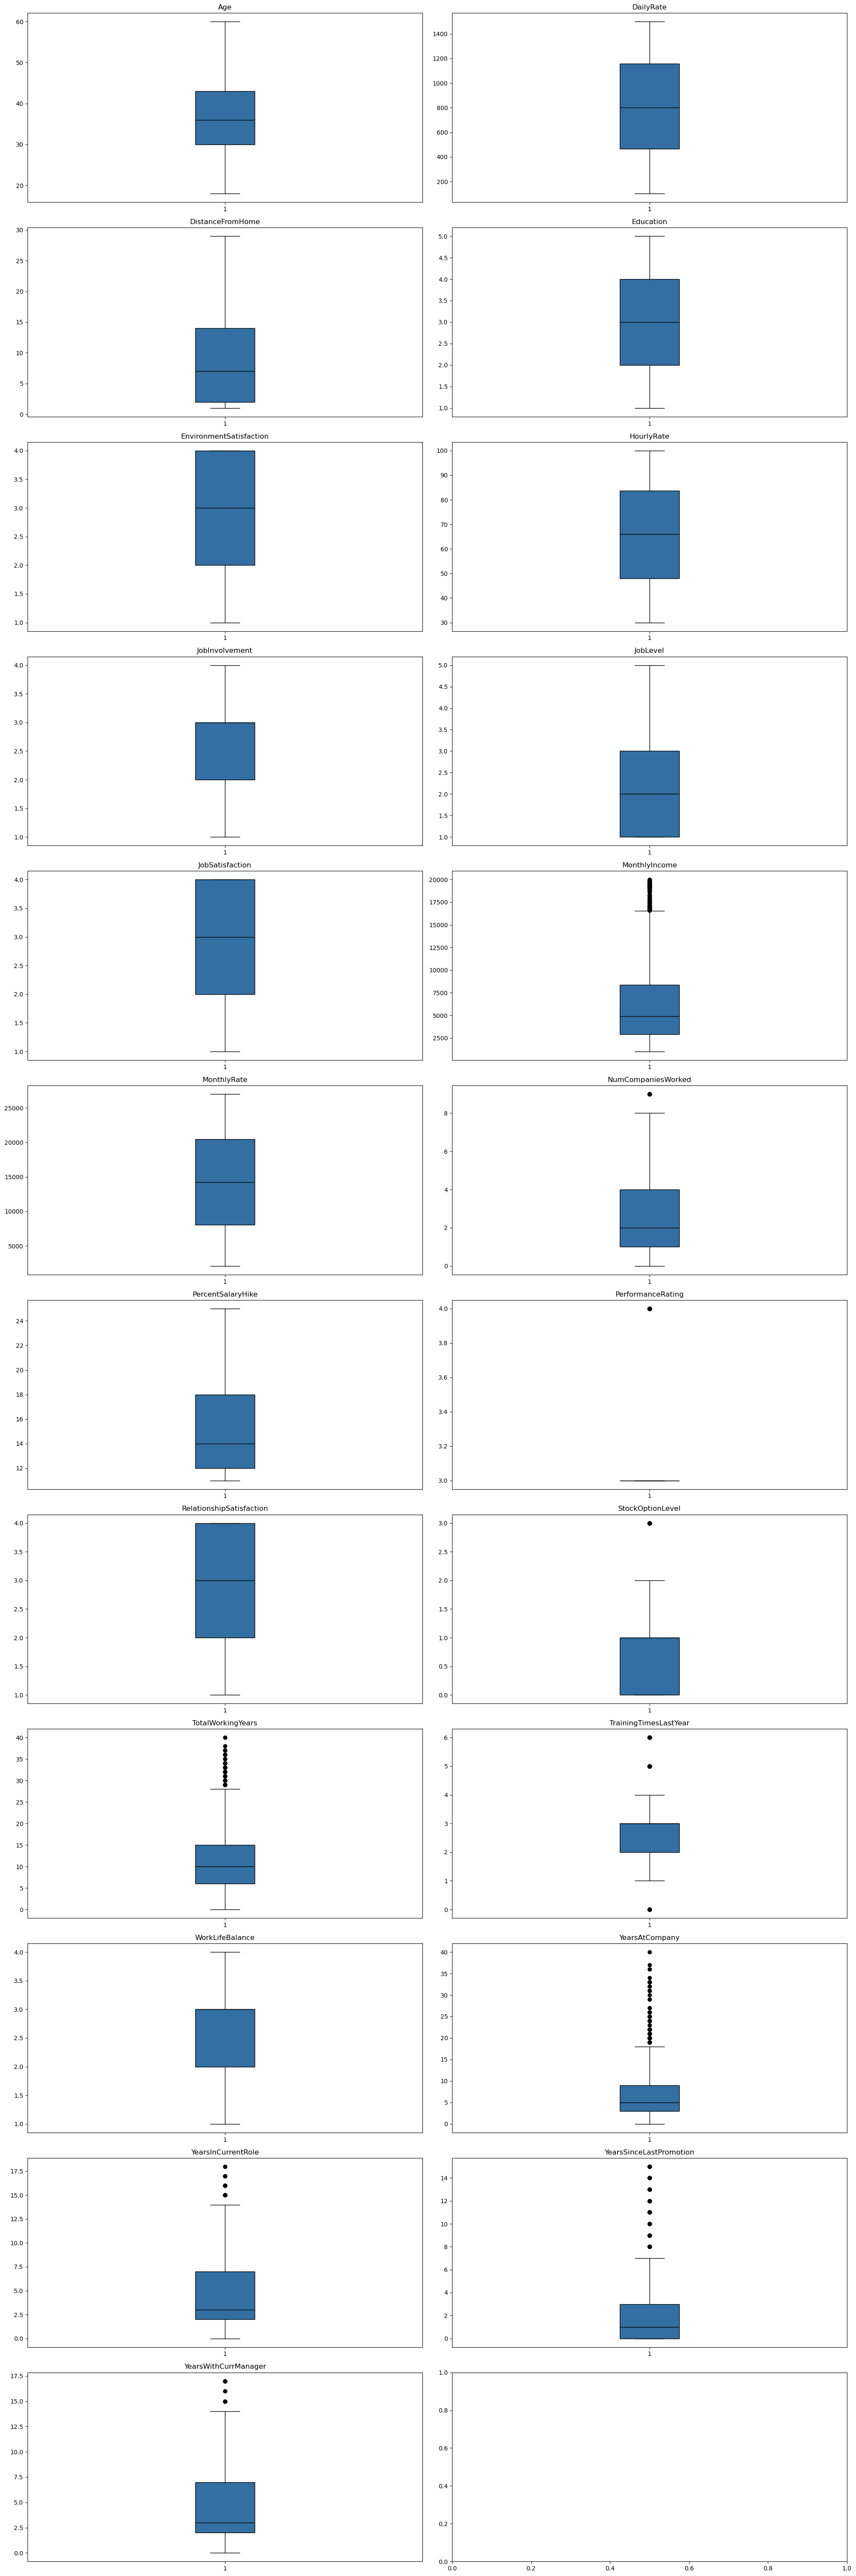

In [9]:
from funciones.funciones import plot_outliers
plot_outliers(df_employees)

<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:18px; border-radius:8px; font-size:15px; line-height:1.8;">

<p style="margin-bottom:16px;">
✔️ Para este análisis he decidido <strong>no remover los outliers</strong>, ya que se trata de valores que pueden ser reales y no errores de carga de datos.
</p>

<p style="margin-bottom:16px;">
En particular, al trabajar con un <strong>dataset de empleados</strong>, es razonable esperar que existan registros con valores elevados en variables como <code>MonthlyIncome</code>, <code>TotalWorkingYears</code> o <code>NumCompaniesWorked</code>.
</p>

<p style="margin-bottom:0;">
Eliminar estos datos podría llevar a perder información valiosa sobre perfiles poco frecuentes pero legítimos.
</p>

</div>


<a id="5"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">ANÁLISIS EXPLORATORIO</p>

### <code>Análisis de sesgos por edad</code>



<div style="border-left:4px solid #49DE80; background-color:#f0fdf5; padding:12px; border-radius:8px; font-size:15px; line-height:1.8;">

Se utiliza <code>groupby</code> para calcular la <span style="color:black;"><strong>tasa de retiro promedio por grupo etario</strong></span>, con el objetivo de identificar si existen patrones claros entre edad y renuncia.

<p style="margin-top:12px;">Este enfoque permite observar tendencias sin caer en conclusiones causales, ofreciendo una base sólida para futuras decisiones de modelado o estrategias de retención.</p>

</div>


In [10]:
df_employees["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [11]:
df_employees['Attrition'] = df_employees['Attrition'].map({'Yes': 1, 'No': 0})

In [47]:
tasa_de_retiro_etaria = round(df_employees.groupby("Age").agg({"Attrition" : "mean"}).reset_index(), 2)
tasa_de_retiro_etaria

,Age,Attrition
0,18,0.50
1,19,0.67
2,20,0.55
3,21,0.46
4,22,0.31
5,23,0.29
6,24,0.27
7,25,0.23
8,26,0.31
9,27,0.06


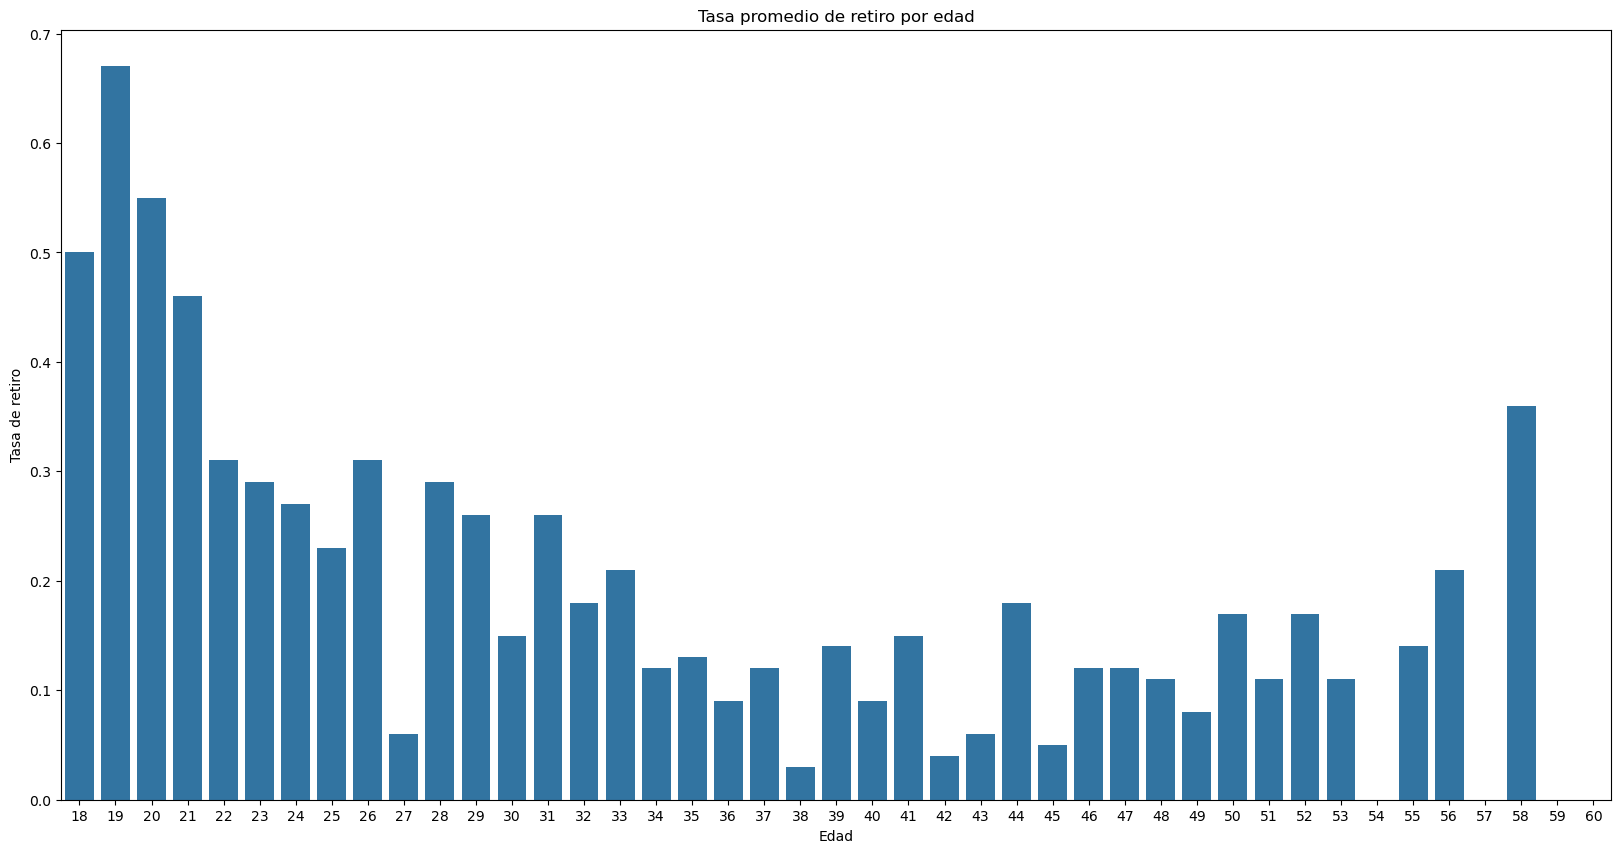

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(data=tasa_de_retiro_etaria, x="Age", y="Attrition")
plt.title("Tasa promedio de retiro por edad")
plt.xlabel("Edad")
plt.ylabel("Tasa de retiro")
plt.show()

Text(0, 0.5, 'Frecuencia')

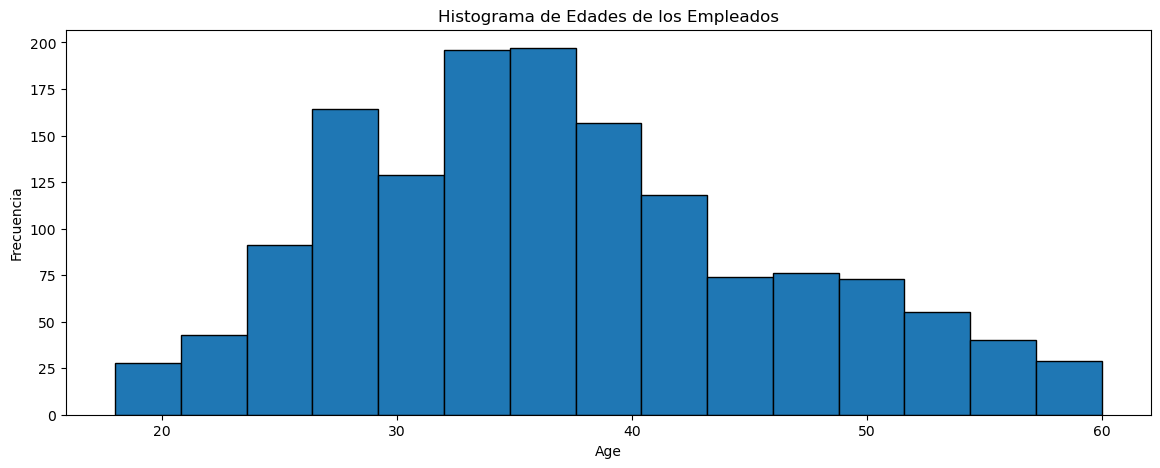

In [14]:
plt.figure(figsize=(14, 5))
plt.hist(df_employees['Age'], bins=15, edgecolor='black')
plt.title('Histograma de Edades de los Empleados')
plt.xlabel('Age')
plt.ylabel('Frecuencia')



### <code>Creo histogramas de edad para Attrition y no Attrition</code>

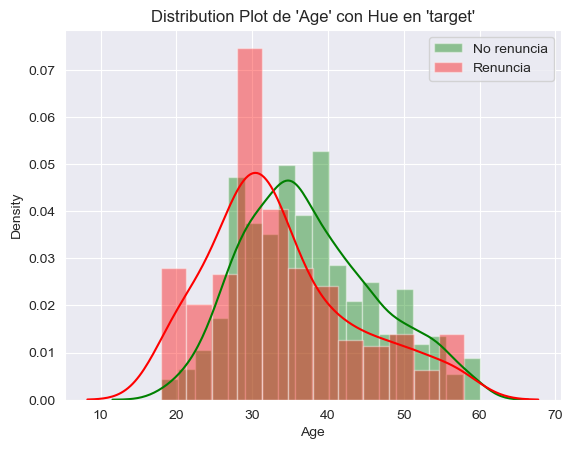

In [15]:
sns.set_style('darkgrid')

filtro1 = df_employees["Attrition"] == 0
filtro2 = df_employees["Attrition"] == 1

sns.distplot(df_employees[filtro1]['Age'], label="No renuncia", color="green")
sns.distplot(df_employees[filtro2]['Age'], label="Renuncia", color="red")

plt.title("Distribution Plot de 'Age' con Hue en 'target'")
plt.legend()
plt.show()

In [16]:
def grupo_etario(x):
    if x <= 30:
        return "joven"
    elif 31 <= x <= 45:
        return "adulto"
    else:
        return "senior"

df_employees["grupo_etario"] = df_employees["Age"].apply(grupo_etario)

In [17]:
df_employees.groupby("grupo_etario").agg({"Attrition" : "mean"}).reset_index()

,grupo_etario,Attrition
0,adulto,0.127004
1,joven,0.259067
2,senior,0.124542


<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:12px; border-radius:8px; font-size:15px; line-height:1.8;">

✔️ Podemos decir entonces que el grupo etario que tiene <span style="color:black;"><strong>mayor tasa de incumplimiento es el de los jóvenes</strong></span>, pero <span style="color:black;"><strong>no podemos afirmar que la edad sea un factor determinante</strong></span> para la renuncia.

<p style="margin-top:12px;">Este tipo de análisis observacional es útil para generar hipótesis, pero requiere modelado más profundo para confirmar su impacto real.</p>

</div>


### <code>Análisis de sesgos por MonthlyIncome</code>

<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:12px; border-radius:8px; font-size:15px; line-height:1.8;">

Se generan histogramas de la variable <code>MonthlyIncome</code> para observar y comparar la distribución de ingresos mensuales entre los empleados que <span style="color:black;"><strong>renunciaron</strong></span> y los que <span style="color:black;"><strong>permanecen</strong></span> en la empresa.

<p style="margin-top:12px;">Este análisis permite detectar posibles <span style="color:black;"><strong>sesgos o diferencias estructurales</strong></span> en los niveles salariales que podrían influir en la decisión de renunciar, aunque no implica causalidad directa.</p>

</div>


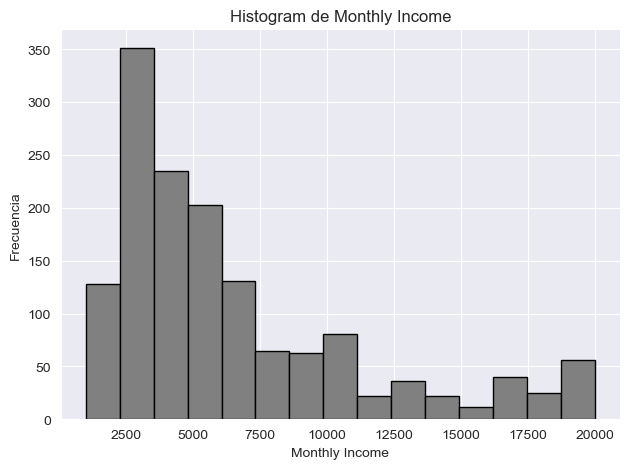

In [18]:
plt.figsize=(14, 5)
plt.hist(df_employees['MonthlyIncome'], bins=15, edgecolor='black', color='gray')
plt.title('Histogram de Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [19]:
yes_attrition = df_employees[df_employees['Attrition'] == 1]
no_attrition = df_employees[df_employees['Attrition'] == 0]

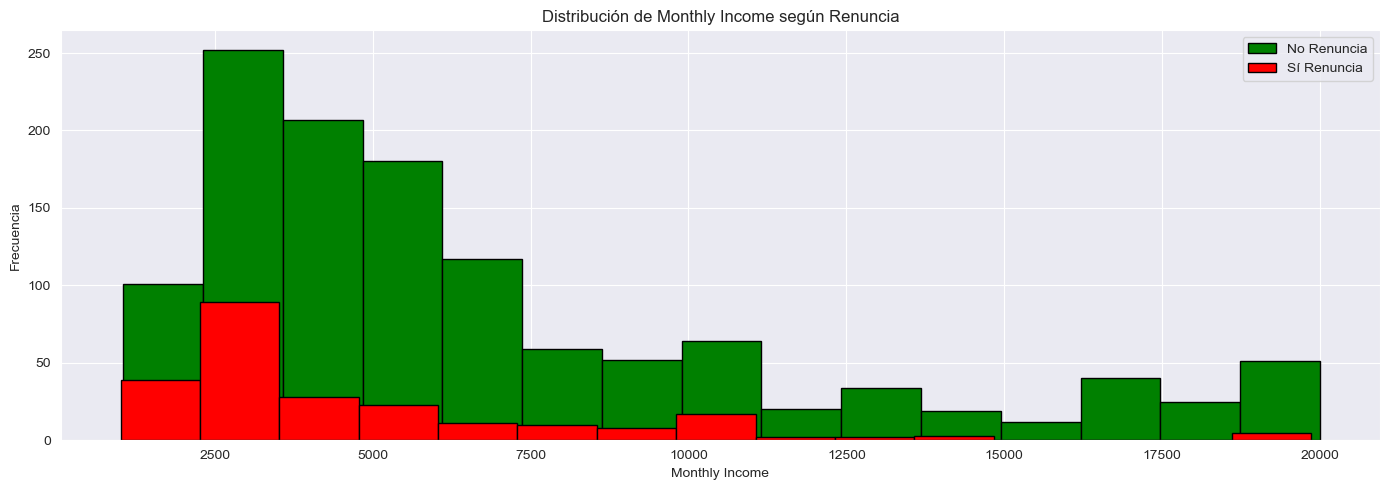

In [20]:
plt.figure(figsize=(14, 5))

plt.hist(no_attrition["MonthlyIncome"], bins=15, edgecolor='black', color="green", label='No Renuncia')
plt.hist(yes_attrition["MonthlyIncome"], bins=15, edgecolor='black', color="red", label='Sí Renuncia')

plt.title('Distribución de Monthly Income según Renuncia')
plt.xlabel('Monthly Income')
plt.ylabel('Frecuencia')
plt.legend()
plt.tight_layout()
plt.show()


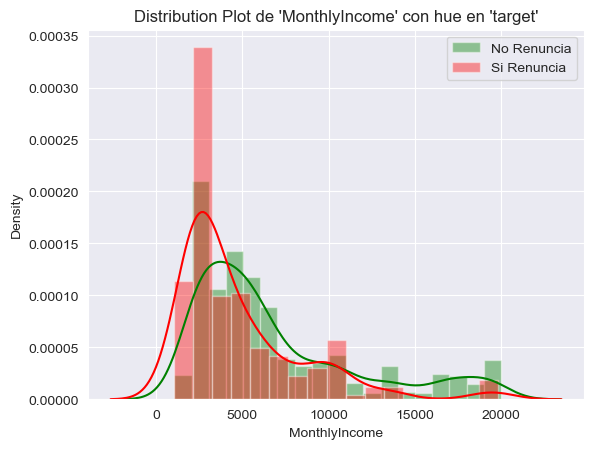

In [21]:
sns.set_style('darkgrid')

sns.distplot(no_attrition["MonthlyIncome"], label="No Renuncia", color="green")
sns.distplot(yes_attrition["MonthlyIncome"], label="Si Renuncia", color="red")

plt.title("Distribution Plot de 'MonthlyIncome' con hue en 'target'")
plt.legend()
plt.show()

<div style="border-left:5px solid #FFA726; background-color:#FFF8E1; padding:12px; border-radius:8px; font-size:15px;">
📌 Se observa que los empleados con salarios más bajos presentan una mayor proporción de renuncias, aunque existe superposición considerable entre ambos grupos. Esto sugiere una posible correlación entre bajos ingresos y deserción, pero se recomienda validarlo con técnicas de modelado supervisado.
</div>


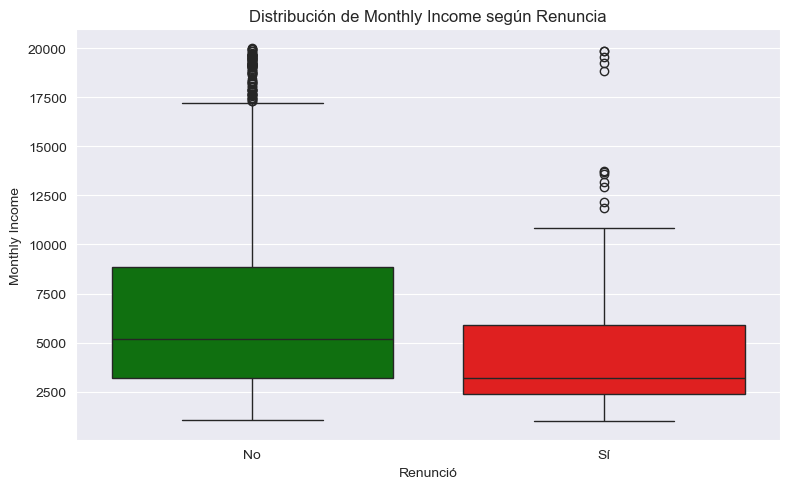

In [22]:
df_boxplot = pd.concat([
    pd.DataFrame({"MonthlyIncome": no_attrition["MonthlyIncome"], "Attrition": "No"}), # Los empleados que no renuncian tienen un ingreso mensual más alto.
    pd.DataFrame({"MonthlyIncome": yes_attrition["MonthlyIncome"], "Attrition": "Sí"}) # Los empleados que renuncian tienen una media de ingresos más bajos.
])

plt.figure(figsize=(8, 5))
sns.boxplot(x="Attrition", y="MonthlyIncome", data=df_boxplot, palette={"No": "green", "Sí": "red"}, hue="Attrition", legend=False)

plt.title("Distribución de Monthly Income según Renuncia")
plt.xlabel("Renunció")
plt.ylabel("Monthly Income")
plt.tight_layout()
plt.show()


### <code>Tasa de Attrition por departamento</code>




In [23]:
df_employees.groupby("Department").agg({"Attrition" : "mean"}).reset_index()

,Department,Attrition
0,Human Resources,0.190476
1,Research & Development,0.138398
2,Sales,0.206278


### <code>Distribución general de la variable Attrition</code>

<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:12px; border-radius:8px; font-size:15px; line-height:1.8;">

Se presenta la distribución global de la variable <code>Attrition</code>, que indica si un empleado ha dejado la empresa o no.

<p style="margin-top:12px;">Este gráfico permite observar el <span style="color:black;"><strong>desbalance de clases</strong></span>, aspecto fundamental a tener en cuenta durante el modelado.</p>

</div>


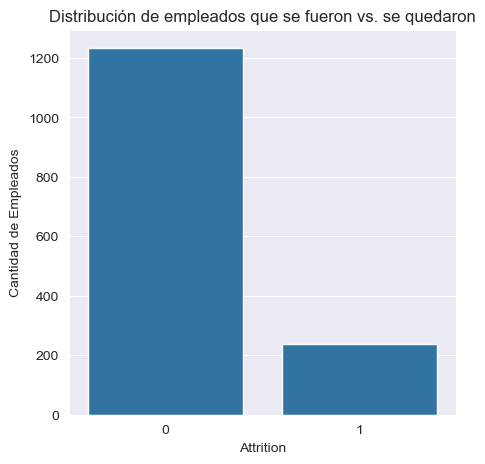

In [24]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_employees, x='Attrition')
plt.title("Distribución de empleados que se fueron vs. se quedaron")
plt.ylabel("Cantidad de Empleados")
plt.show()


### <code>Análisis por variables categóricas (satisfacción, desempeño, balance)</code>

<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:12px; border-radius:8px; font-size:15px; line-height:1.8;">

Se examinan variables cualitativas clave como <span style="color:black;"><strong>satisfacción laboral</strong></span>, <span style="color:black;"><strong>desempeño</strong></span> y <span style="color:black;"><strong>balance vida-trabajo</strong></span> para detectar patrones entre empleados que renuncian y quienes permanecen en la empresa.

<p style="margin-top:12px;">Este análisis es crucial para comprender las <span style="color:black;"><strong>causas subyacentes detrás de la deserción</strong></span>, más allá de lo numérico.</p>

</div>


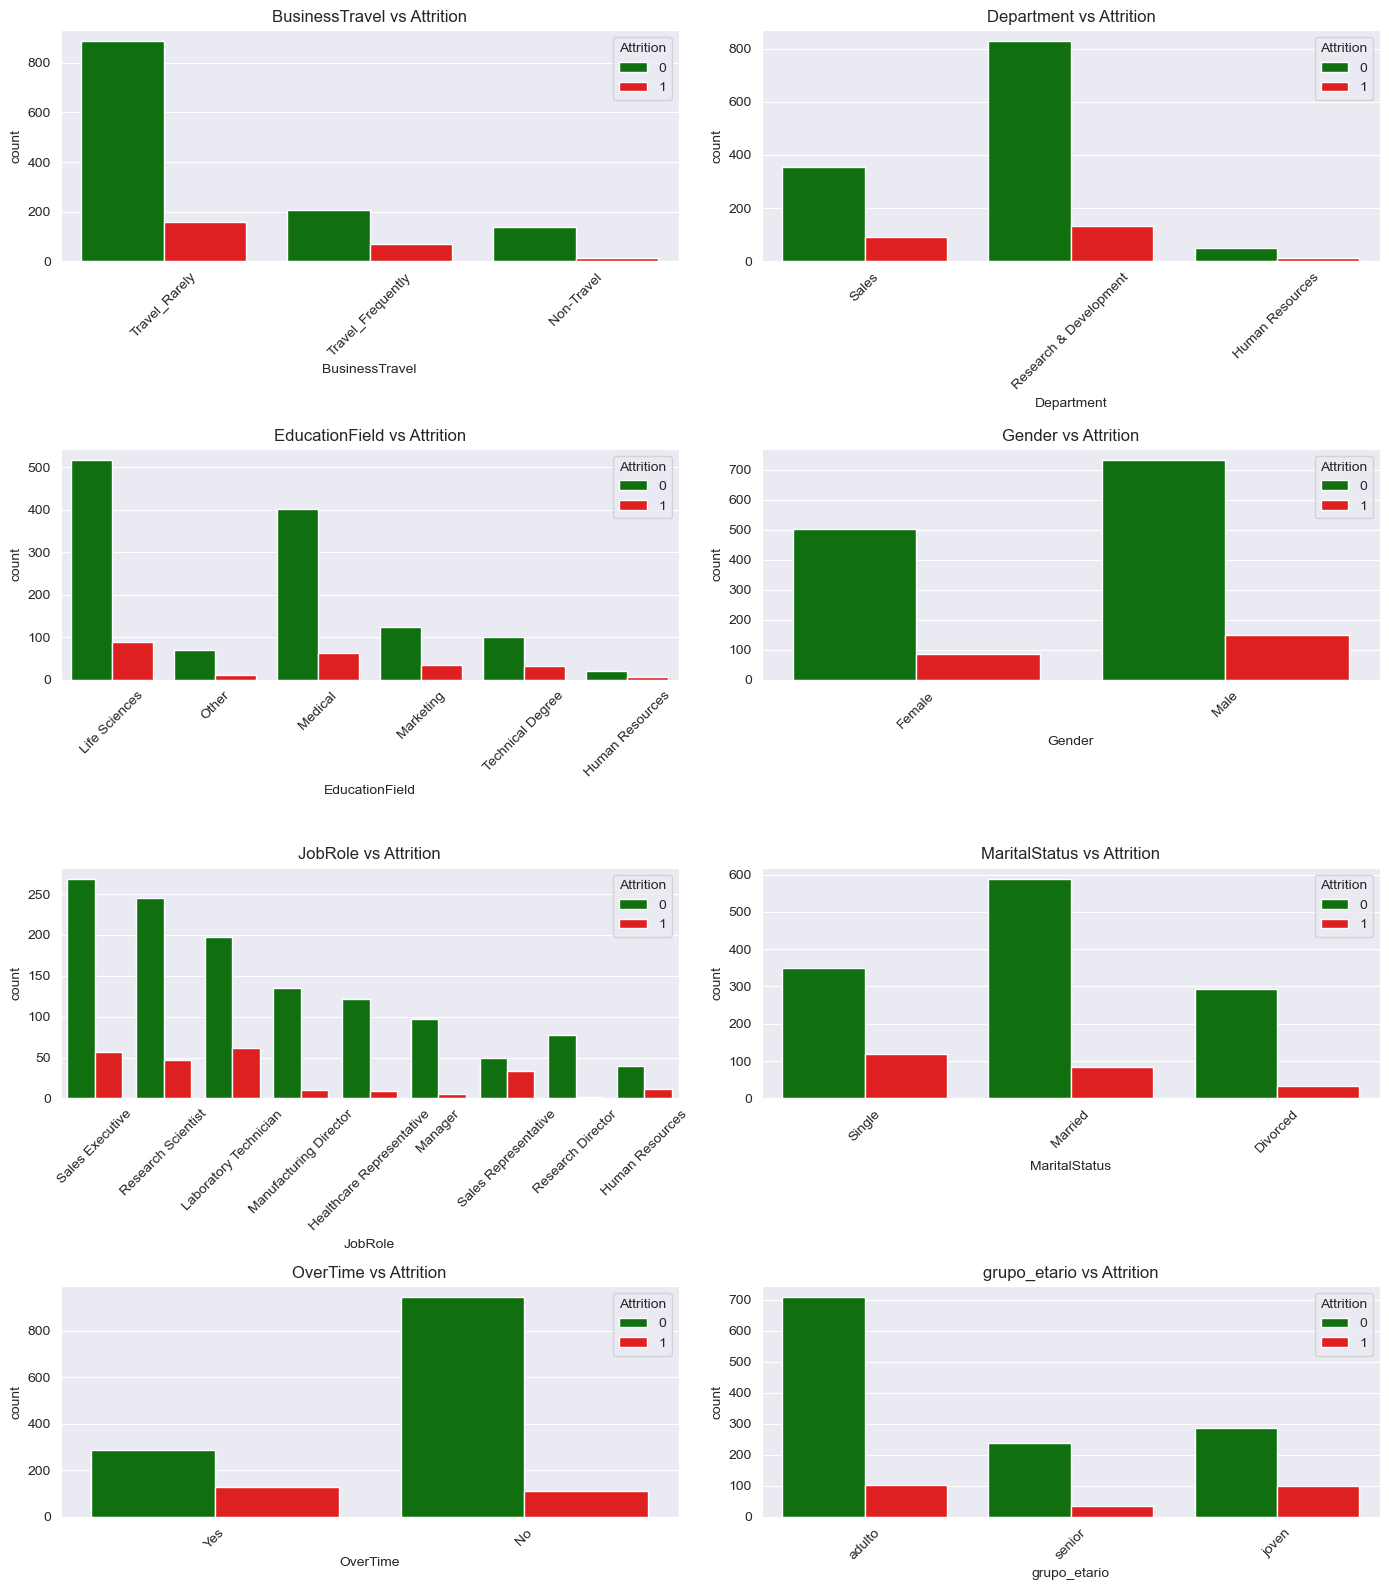

In [25]:
categoricas = df_employees.select_dtypes(exclude=[np.number]).columns.tolist()

categoricas = categoricas

fig, axs = plt.subplots(math.ceil(len(categoricas)/2), 2, figsize=(14, 4 * math.ceil(len(categoricas)/2)))
axs = axs.flatten()

custom_palette = {1: 'Red', 0: 'Green'}

for i, col in enumerate(categoricas):
    sns.countplot(data=df_employees, x=col, hue='Attrition', palette=custom_palette, ax=axs[i])
    axs[i].set_title(f'{col} vs Attrition')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 📌 Conclusión

<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:15px; border-radius:8px; font-size:15px;">

Con base en el análisis realizado, los empleados que han decidido abandonar la empresa tienden a compartir ciertas características que los distinguen del resto.

A continuación, se resumen las principales tendencias observadas:

</div>

<table style="width:80%; border-collapse: collapse;">
  <thead style="background-color:#031913; color:#49DE80;">
    <tr>
      <th style="padding:10px; border:1px solid #ddd;">Columna (Característica)</th>
      <th style="padding:10px; border:1px solid #ddd;">Tendencia entre quienes se van</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">🧑‍🎓 <code>Age</code></td>
      <td style="padding:8px; border:1px solid #ddd;">Más jóvenes</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">🏠 <code>DistanceFromHome</code></td>
      <td style="padding:8px; border:1px solid #ddd;">Mayor distancia</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">📈 <code>TotalWorkingYears</code></td>
      <td style="padding:8px; border:1px solid #ddd;">Menor experiencia</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">😊 <code>JobSatisfaction</code></td>
      <td style="padding:8px; border:1px solid #ddd;">Baja satisfacción laboral</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">⚖️ <code>WorkLifeBalance</code></td>
      <td style="padding:8px; border:1px solid #ddd;">Bajo equilibrio vida-trabajo</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">💼 <code>JobInvolvement</code></td>
      <td style="padding:8px; border:1px solid #ddd;">Bajo involucramiento en el trabajo</td>
    </tr>
    <tr>
      <td style="padding:8px; border:1px solid #ddd;">🔁 <code>NumCompaniesWorked</code></td>
      <td style="padding:8px; border:1px solid #ddd;">Mayor rotación laboral previa</td>
    </tr>
  </tbody>
</table>

<div style="margin-top:15px; border-left:5px solid #49DE80; background-color:#f0fdf5; padding:15px; border-radius:8px; font-size:15px;">
Estas tendencias sugieren que el <strong>compromiso, la satisfacción y la estabilidad laboral</strong> son factores clave a considerar en estrategias de retención de talento.
</div>


<a id="6"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">PREPROCESAMIENTO DE LOS DATOS</p>

### <code>Seleección de Características</code>

<div style="border-left:4px solid #49DE80; background-color:#f0fdf5; padding:12px; border-radius:8px; font-size:15px; line-height:1.8;">

Decido qué variables incluir en el modelo. Considero <span style="color:black;"><strong>excluir variables con sesgos introducidos artificialmente</strong></span> para evaluar su impacto en el rendimiento del modelo.

<p style="margin-top:12px;">
Este paso permite validar si ciertas variables —que podrían estar correlacionadas con la variable objetivo pero no tener valor predictivo real— están influyendo injustamente en el desempeño.
</p>

</div>


In [26]:
df_employees.select_dtypes(include=['object']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'grupo_etario'],
      dtype='object')

In [27]:
# Pasamos a booleanos las columnas categóricas con solo dos valores
# df_employees['Attrition'] = df_employees['Attrition'].map({'Yes': 1, 'No': 0})
df_employees['Male'] = df_employees['Gender'].map({'Male': 1, 'Female': 0})
df_employees['OverTime'] = df_employees['OverTime'].map({'Yes': 1, 'No': 0})

df_employees = df_employees.drop(['Gender', 'grupo_etario'], axis=1)

In [28]:
df_employees = pd.get_dummies(df_employees, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])
df_employees = df_employees.replace({True: 1, False: 0})

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_9976/2494471009.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_employees = df_employees.replace({True: 1, False: 0})


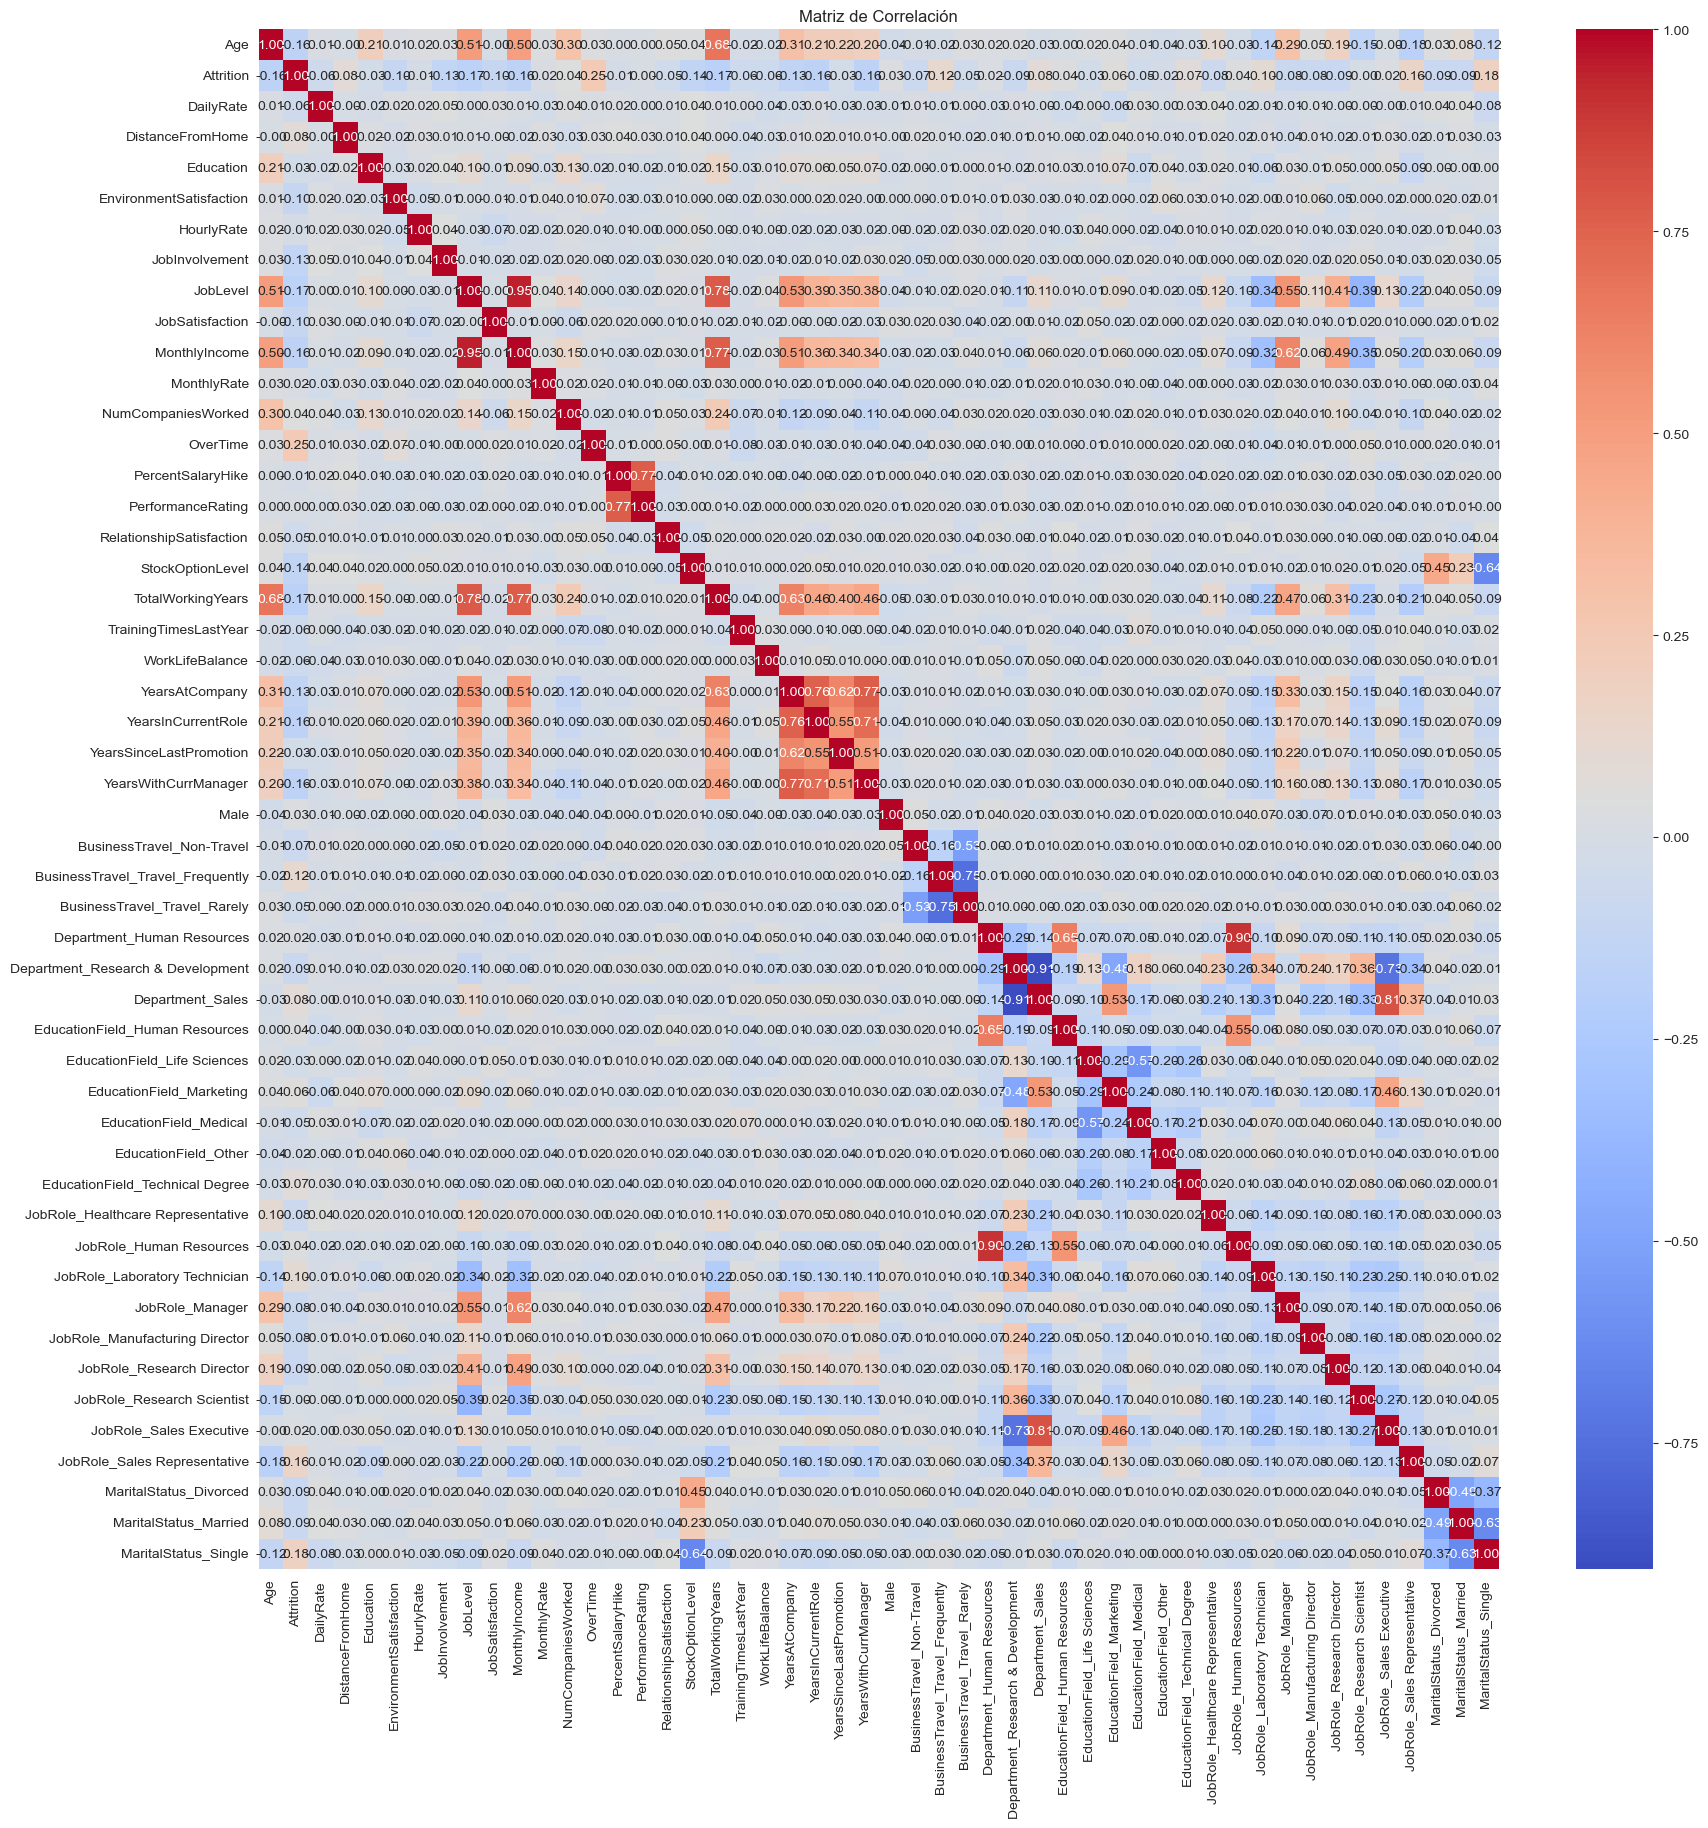

In [29]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_employees.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()

In [30]:
df_employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EnvironmentSatisfaction            1470 non-null   int64
 6   HourlyRate                         1470 non-null   int64
 7   JobInvolvement                     1470 non-null   int64
 8   JobLevel                           1470 non-null   int64
 9   JobSatisfaction                    1470 non-null   int64
 10  MonthlyIncome                      1470 non-null   int64
 11  MonthlyRate                        1470 non-null   int64
 12  NumCompaniesWorked  

<a id="7"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">MODELADO</p>

In [31]:
# Separo mi df en X e Y
X = df_employees.drop(['Attrition'], axis=1)
y = df_employees['Attrition']

# Separo en train y test con 0.2 en test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,  # Para mantener la distribución de la variable objetivo
    random_state=42
)

### <code>¿Está desbalanceado mi dataset?</code>




In [32]:
# Contar la cantidad de valores de cada clase
counts = y.value_counts()

# Calcular la proporción de cada clase
prop = counts / counts.sum()

# Imprimir los resultados
print("Número de muestras por clase:\n", counts)
print("\nProporción de muestras por clase:\n", prop)


Número de muestras por clase:
 Attrition
0    1233
1     237
Name: count, dtype: int64

Proporción de muestras por clase:
 Attrition
0    0.838776
1    0.161224
Name: count, dtype: float64


<div style="border-left:5px solid red; background-color:#ffe6e6; padding:10px; border-radius:5px;">
⚠️ <strong>Advertencia:</strong> Claramente este dataset esta desbalanceado, por lo tanto vamos a necesitar usar un <code>metodo de balanceo de clases</code>
</div>


In [33]:
def model_trial(model, parameters):
    np.random.seed(42)

    # Definimos los 5 splits (cv) para mantener la proporción de clases
    kf = StratifiedKFold(n_splits=5, shuffle=False)

    # Definimos el pipeline
    pipe = Pipeline(steps=[
        ('sampler', 'passthrough'),  # Balanceo de clases
        #('imputer', SimpleImputer(strategy='median')),  # Imputación de valores faltantes
        ('scaler', StandardScaler()),  # Escalado de variables numericas
        ('selector', SelectKBest(f_classif)),  # Selección de k características mejores
        ('classifier', model)  # Modelo
    ])


    # Hiperparámetros + opciones de balanceo
    full_param_grid = {
        'sampler': ['passthrough', SMOTE(), RandomOverSampler(), SMOTEENN(), SMOTETomek()], # estrategias de balanceo de clases
        'selector__k': [10, 15, 20, 25, 30, 35], # número de variables a seleccionar
        **parameters # parametros propios de clasificacion
    }

    # RandomizedSearchCV con scoring basado en recall (quiero optimizar esa métrica)
    grid = RandomizedSearchCV(pipe, full_param_grid, cv=kf, scoring='recall')
    grid.fit(X_train, y_train)

    # Obtenemos el mejor modelo
    best_params = grid.best_params_ # mejor combinación de hiperparámetros encontrada
    best_model = grid.best_estimator_ # pipeline completo (incluyendo modelo y preprocesamiento) con mejor rendimiento
    best_score = grid.best_score_ # mejor valor de la métrica usada en CV (en este caso, recall)

    # Métricas de entrenamiento
    y_train_pred = best_model.predict(X_train)
    auc_roc_train = roc_auc_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)

    # Métricas de test
    y_pred = best_model.predict(X_test)
    auc_roc = roc_auc_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    # Prints
    print(f"Mejores parámetros: {best_params}")
    print(f"AUC-ROC Train: {auc_roc_train} and AUC-ROC Test: {auc_roc}")
    print(f"F1-Score Train: {f1_train} and F1-Score Test: {f1}")
    print(f"Precision Train: {precision_train} and Precision Test: {precision}")
    print(f"Recall-Score Train: {recall_train} and Recall-Score Test: {recall}")
    ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)

    return recall, auc_roc, f1, precision, best_model, recall_train, auc_roc_train, f1_train, precision_train, best_params


<hr style="height:2px;border-width:0;color:#49DE80;background-color:#49DE80">

## **Logistic Regresion**

Mejores parámetros: {'selector__k': 25, 'sampler': 'passthrough', 'classifier__class_weight': 'balanced', 'classifier__C': 0.01}
AUC-ROC Train: 0.7713195259955162 and AUC-ROC Test: 0.7260315272633302
F1-Score Train: 0.5183887915936952 and F1-Score Test: 0.48780487804878053
Precision Train: 0.3884514435695538 and Precision Test: 0.39473684210526316
Recall-Score Train: 0.7789473684210526 and Recall-Score Test: 0.6382978723404256


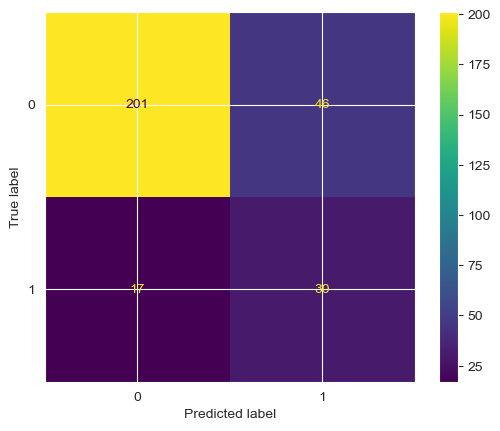

In [34]:
model_lr = LogisticRegression(penalty='l2', random_state=42)

parameters_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1],  # inverso de la regularización L2 (menor C = más regularización)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para tratar desbalance
}

lr = model_trial(model_lr, parameters_lr)


<hr style="height:2px;border-width:0;color:#49DE80;background-color:#49DE80">


## **Random Forest**

Mejores parámetros: {'selector__k': 20, 'sampler': SMOTEENN(), 'classifier__n_estimators': 250, 'classifier__max_leaf_nodes': 14, 'classifier__max_depth': 3, 'classifier__class_weight': None}
AUC-ROC Train: 0.704996263478168 and AUC-ROC Test: 0.6759410801963993
F1-Score Train: 0.4429065743944636 and F1-Score Test: 0.40259740259740256
Precision Train: 0.32989690721649484 and Precision Test: 0.2897196261682243
Recall-Score Train: 0.6736842105263158 and Recall-Score Test: 0.6595744680851063


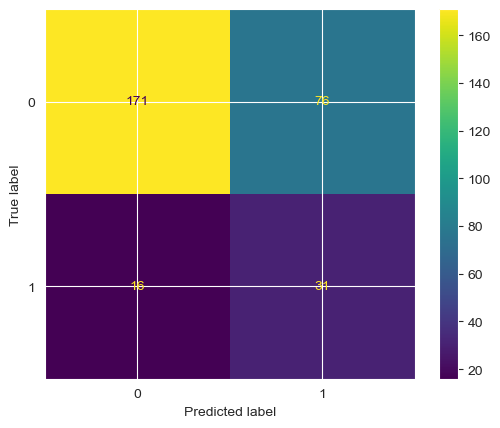

In [35]:
model_rf = RandomForestClassifier(random_state=42)

parameters_rf = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # cantidad de árboles
    'classifier__max_depth': [3, 4, 5, 6, 7, 8],  # profundidad máxima de cada árbol (más profundo = más complejo)
    'classifier__max_leaf_nodes': [4, 6, 8, 10, 12, 14, 16, 18, 20],  # máximo número de nodos internos (controla el tamaño del árbol)
    'classifier__class_weight': [None, 'balanced']  # ajusta el peso de las clases para manejar desbalance
}

rf = model_trial(model_rf, parameters_rf)


<hr style="height:2px;border-width:0;color:#49DE80;background-color:#49DE80">


## **XGBoost**


Mejores parámetros: {'selector__k': 30, 'sampler': RandomOverSampler(), 'classifier__subsample': 0.7, 'classifier__scale_pos_weight': 2, 'classifier__reg_lambda': 1, 'classifier__reg_alpha': 0.1, 'classifier__n_estimators': 150, 'classifier__min_child_weight': 5, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.8}
AUC-ROC Train: 0.8868474431514892 and AUC-ROC Test: 0.7022568696700835
F1-Score Train: 0.6501766784452296 and F1-Score Test: 0.43971631205673756
Precision Train: 0.48936170212765956 and Precision Test: 0.32978723404255317
Recall-Score Train: 0.968421052631579 and Recall-Score Test: 0.6595744680851063


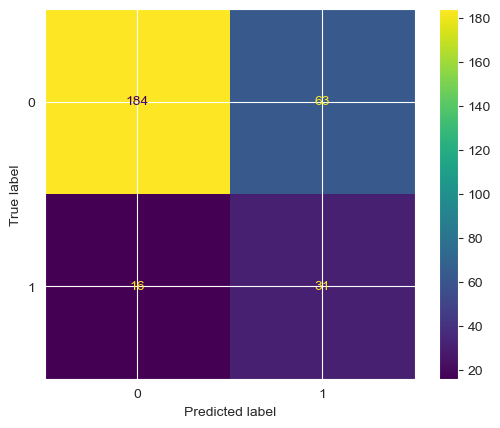

In [36]:
model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

parameters_xgb = {
    'classifier__n_estimators': [100, 150, 200, 250, 300],  # divisiones del modelo XGB
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # mínimo information gain por división
    'classifier__max_depth': [3, 4, 5, 6, 7],  # reducir la profundidad
    'classifier__min_child_weight': [4, 5, 6, 7],  # mayor peso = menos división
    'classifier__subsample': [0.6, 0.7, 0.8],  # igual, introduce aleatoriedad
    'classifier__colsample_bytree': [0.6, 0.7, 0.8],  # también baja un poco la complejidad
    'classifier__reg_alpha': [0.1, 0.5, 1],  # regularización L1
    'classifier__reg_lambda': [1, 2, 3],  # regularización L2
    'classifier__scale_pos_weight': [1, 1.5, 2]  # balanceo de clases para regresión logística
}

xgb = model_trial(model_xgb, parameters_xgb)

<hr style="height:2px;border-width:0;color:#49DE80;background-color:#49DE80">


## **LightGBM**


Mejores parámetros: {'selector__k': 10, 'sampler': SMOTEENN(), 'classifier__subsample': 0.6, 'classifier__scale_pos_weight': 2, 'classifier__reg_lambda': 0.5, 'classifier__reg_alpha': 0.1, 'classifier__num_leaves': 31, 'classifier__n_estimators': 300, 'classifier__min_child_samples': 60, 'classifier__max_depth': 2, 'classifier__learning_rate': 0.01, 'classifier__colsample_bytree': 0.6}
AUC-ROC Train: 0.6445873812319847 and AUC-ROC Test: 0.613274183822896
F1-Score Train: 0.3577052868391451 and F1-Score Test: 0.3319148936170213
Precision Train: 0.22746781115879827 and Precision Test: 0.2074468085106383
Recall-Score Train: 0.8368421052631579 and Recall-Score Test: 0.8297872340425532


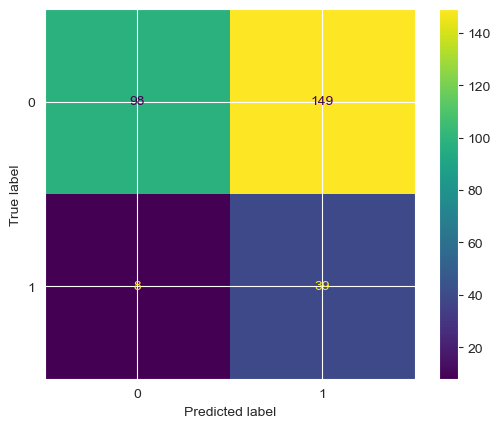

In [37]:
model_lgbm = LGBMClassifier(random_state=42, verbose=-1)

parameters_lgbm = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [2, 3, 4, 5, 6],  # menos profundidad para evitar árboles muy especializados
    'classifier__learning_rate': [0.01, 0.05],  # más bajo = menos riesgo de overfit, pero más lento
    'classifier__num_leaves': [15, 31, 50],  # menos hojas = árboles menos complejos
    'classifier__min_child_samples': [20, 40, 60],  # aumentar mínimo para evitar divisiones por ruido
    'classifier__subsample': [0.6, 0.7, 0.8],  # igual, introduce aleatoriedad
    'classifier__colsample_bytree': [0.6, 0.7],  # también baja un poco la complejidad
    'classifier__scale_pos_weight': [1, 2, 3, 5],  # probá esto para clases desbalanceadas
    'classifier__reg_alpha': [0.0, 0.1, 0.5],  # regularización L1
    'classifier__reg_lambda': [0.0, 0.1, 0.5, 1.0]  # regularización L2
}

lgbm = model_trial(model_lgbm, parameters_lgbm)

<hr style="height:2px;border-width:0;color:#49DE80;background-color:#49DE80">


## **Cat Boosting**


Mejores parámetros: {'selector__k': 20, 'sampler': SMOTEENN(), 'classifier__scale_pos_weight': 5, 'classifier__learning_rate': 0.01, 'classifier__l2_leaf_reg': 3, 'classifier__iterations': 200, 'classifier__depth': 3}
AUC-ROC Train: 0.6104088822461835 and AUC-ROC Test: 0.591050047377035
F1-Score Train: 0.3314711359404097 and F1-Score Test: 0.31734317343173435
Precision Train: 0.20135746606334842 and Precision Test: 0.19196428571428573
Recall-Score Train: 0.9368421052631579 and Recall-Score Test: 0.9148936170212766


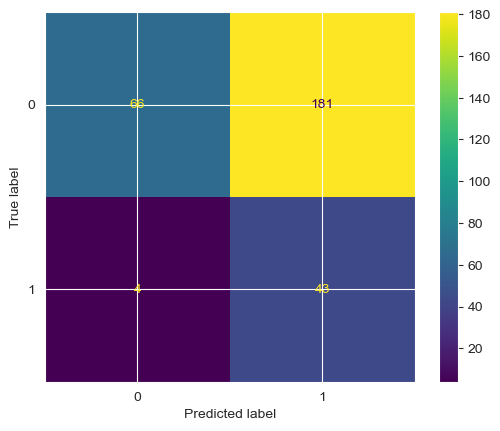

In [38]:
model = CatBoostClassifier(verbose=0, random_state=42)

parameters = {
    'classifier__iterations': [100, 200, 300, 400, 500],  # número total de árboles (iteraciones del boosting)
    'classifier__depth': [3, 4, 5, 6, 7],  # profundidad máxima de cada árbol
    'classifier__learning_rate': [0.01, 0.05, 0.1],  # tasa de aprendizaje (más baja = entrenamiento más lento pero estable)
    'classifier__l2_leaf_reg': [3, 5, 7],  # regularización L2 para evitar overfitting
    'classifier__scale_pos_weight': [1, 5, 10]  # peso aplicado a la clase positiva para tratar desbalance
}

cb = model_trial(model, parameters)

<a id="8"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">EVALUACIÓN DE MODELOS</p>



### ✳️ <span style="color:#49DE80">Comparación basada en métricas de rendimiento en Test</span>

> *Evaluamos múltiples clasificadores priorizando el recall para minimizar falsos negativos.*




In [39]:
def crear_tabla_resultados(lr, rf, xgb, lgbm, cb, scoring='recall'):

    df_funciones = pd.DataFrame()
    df_funciones["metodo"] = ["Regresión Logística", "Random Forest", "XGB", "LGBM", "CatBoost"]

    df_funciones["recall_train"] = [lr[5], rf[5], xgb[5], lgbm[5], cb[5]]
    df_funciones["recall"] = [lr[0], rf[0], xgb[0], lgbm[0], cb[0]]

    df_funciones["precision_train"] = [lr[8], rf[8], xgb[8], lgbm[8], cb[8]]
    df_funciones["precision"] = [lr[3], rf[3], xgb[3], lgbm[3], cb[3]]

    df_funciones["f1_train"] = [lr[7], rf[7], xgb[7], lgbm[7], cb[7]]
    df_funciones["f1"] = [lr[2], rf[2], xgb[2], lgbm[2], cb[2]]

    df_funciones["auc_roc_train"] = [lr[6], rf[6], xgb[6], lgbm[6], cb[6]]
    df_funciones["auc_roc"] = [lr[1], rf[1], xgb[1], lgbm[1], cb[1]]

    df_funciones["best_model"] = [lr[4], rf[4], xgb[4], lgbm[4], cb[4]]
    df_funciones["best_params"] = [lr[9], rf[9], xgb[9], lgbm[9], cb[9]]

    df_funciones = df_funciones.sort_values(by=scoring, ascending=False)

    return df_funciones

In [40]:
tabla = crear_tabla_resultados(lr, rf, xgb, lgbm, cb, scoring='recall')
display(tabla)

,metodo,recall_train,recall,precision_train,precision,f1_train,f1,auc_roc_train,auc_roc,best_model,best_params
4,CatBoost,0.936842,0.914894,0.201357,0.191964,0.331471,0.317343,0.610409,0.591050,"(SMOTEENN(), StandardScaler(), SelectKBest(k=2...","{'selector__k': 20, 'sampler': SMOTEENN(), 'cl..."
3,LGBM,0.836842,0.829787,0.227468,0.207447,0.357705,0.331915,0.644587,0.613274,"(SMOTEENN(), StandardScaler(), SelectKBest(), ...","{'selector__k': 10, 'sampler': SMOTEENN(), 'cl..."
1,Random Forest,0.673684,0.659574,0.329897,0.289720,0.442907,0.402597,0.704996,0.675941,"(SMOTEENN(), StandardScaler(), SelectKBest(k=2...","{'selector__k': 20, 'sampler': SMOTEENN(), 'cl..."
2,XGB,0.968421,0.659574,0.489362,0.329787,0.650177,0.439716,0.886847,0.702257,"(RandomOverSampler(), StandardScaler(), Select...","{'selector__k': 30, 'sampler': RandomOverSampl..."
0,Regresión Logística,0.778947,0.638298,0.388451,0.394737,0.518389,0.487805,0.771320,0.726032,"(passthrough, StandardScaler(), SelectKBest(k=...","{'selector__k': 25, 'sampler': 'passthrough', ..."


<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:15px; border-radius:8px; font-size:15px;">

✔️ <strong>El mejor modelo es <code>CatBoost</code>, que alcanzó un Recall de 0.91</strong>  
Esto significa que el modelo detecta correctamente el 91% de las renuncias reales.

<hr style="border-top: 1px dashed #49DE80;">

✔️ <strong>Sin embargo, debido a la distribución del dataset, todos los modelos sacrifican precisión para maximizar recall</strong>  
Como consecuencia, <code>CatBoost</code> genera más de <strong>180 falsos positivos</strong>.

<hr style="border-top: 1px dashed #49DE80;">

✔️ <strong>Este hallazgo requiere una conversación estratégica con Recursos Humanos</strong>  
Aunque inicialmente se afirmó que <em>"no hay restricciones presupuestarias para retener"</em>, eso podría cambiar si la predicción implica entregar <strong>200 kits de retención innecesarios</strong>.  

Se recomienda discutir:
- El <strong>costo unitario de cada kit</strong>
- La viabilidad de asumir ese sobrecosto
- El <strong>tradeoff real</strong>: <em>Costo de perder a un empleado valioso vs. costo de retener a uno que quizás no se iba</em>

En muchos casos, la decisión más eficiente será aquella que <strong>minimice el costo total esperado</strong>.

</div>


In [41]:
def plot_roc_curves(lr, rf, xgb, lgbm, cb, X_test, y_test):

    modelos = {
        "Logistic Regression": lr[4],
        "Random Forest": rf[4],
        "XGBoost": xgb[4],
        "LightGBM": lgbm[4],
        "CatBoost": cb[4]
    }

    plt.figure(figsize=(9, 6))

    for nombre, modelo in modelos.items():
        # Probabilidades de clase positiva
        y_proba = modelo.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")

    # Línea de referencia (modelo aleatorio)
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Curvas ROC comparativas')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

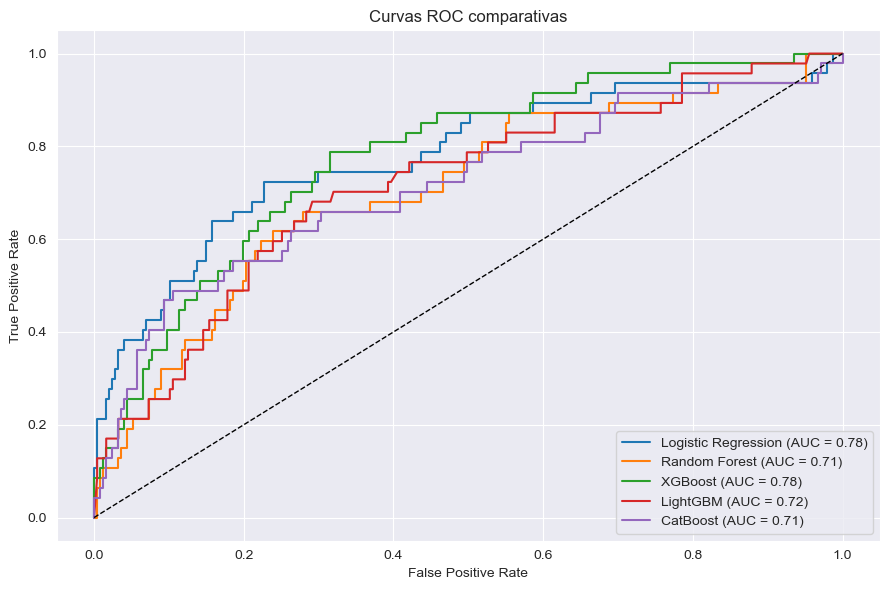

In [42]:
plot_roc_curves(lr, rf, xgb, lgbm, cb, X_test, y_test)

<a id="9"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">LISTADO DE EMPLEADOS EN RIESGO</p>

<div style="border-left:5px solid #49DE80; background-color:#e6ffe6; padding:10px; border-radius:5px;">
📌 <strong>Insight:</strong> Este listado ordenado permite al área de Recursos Humanos identificar y priorizar acciones para empleados con mayor probabilidad de renuncia, activando <strong>kits de retención, entrevistas de seguimiento</strong> o ajustes personalizados.
</div>


In [43]:
# Paso 1: Usamos el mejor modelo (CatBoost) para predecir las probabilidades de renuncia
mejor_modelo = cb[4]
probs_renuncia = mejor_modelo.predict_proba(X_test)[:, 1]

# Paso 2: Creamos un DataFrame con los resultados de predicción
df_resultados = X_test.copy()
df_resultados['Probabilidad_Renuncia'] = probs_renuncia
df_resultados['Attrition_Real'] = y_test.values

# Paso 3: Ordenamos los empleados por mayor probabilidad de renuncia
df_ordenado = df_resultados.sort_values(by='Probabilidad_Renuncia', ascending=False)

# Paso 5: Mostrar las características de los 10 empleados con mayor probabilidad de renunciar
columnas_interes = [
    'Age',
    'MonthlyIncome',
    'DistanceFromHome',
    'JobSatisfaction',
    'WorkLifeBalance',
    'TotalWorkingYears',
    'NumCompaniesWorked',
    'Probabilidad_Renuncia',
    'Attrition_Real'
]

top_10_empleados = df_ordenado[columnas_interes].head(10)
top_10_empleados


,Age,MonthlyIncome,DistanceFromHome,JobSatisfaction,WorkLifeBalance,TotalWorkingYears,NumCompaniesWorked,Probabilidad_Renuncia,Attrition_Real
357,21,2174,1,2,3,3,1,0.959781,1
688,19,2121,21,2,4,1,1,0.954438,1
1391,38,2858,1,1,2,20,4,0.945416,0
301,18,1200,10,3,3,0,1,0.945024,0
36,50,2683,3,3,3,3,1,0.931614,1
819,28,3201,2,2,1,6,0,0.930770,0
711,29,2404,10,1,3,3,6,0.930469,1
318,27,2478,5,2,2,4,1,0.929555,0
1021,25,4400,9,1,3,6,3,0.927587,1
2,37,2090,2,3,3,7,6,0.925993,1


<a id="10"></a>
# <p style="background-color:#031913;font-family:newtimeroman;color:#49DE80;font-size:150%;text-align:center;border-radius:10px 10px;">CONCLUSIONES FINALES</p>

<div style="border-left:5px solid #49DE80; background-color:#f0fdf5; padding:15px; border-radius:8px; font-size:15px;">

✔️ <strong>Se identificaron factores clave</strong> que permiten distinguir a los empleados con mayor riesgo de renunciar:

<ul>
  <li>Jóvenes</li>
  <li>Con menos experiencia (menos años trabajados en total)</li>
  <li>Baja satisfacción laboral</li>
  <li>Bajo balance vida-trabajo</li>
  <li>Mayor cantidad de trabajos previos</li>
  <li>Menores ingresos</li>
  <li>Mayor distancia desde su casa al trabajo</li>
</ul>

<hr style="border-top: 1px dashed #49DE80;">

<p style="font-size:15px; line-height:1.8;">
✔️ <strong>Se entrenaron y compararon cinco modelos predictivos</strong>, priorizando la métrica <code>Recall</code> para minimizar falsos negativos:
</p>

<ul style="margin-left:20px; font-size:15px; line-height:1.6;">
  <li><strong>Logistic Regression</strong></li>
  <li><strong>Random Forest</strong></li>
  <li><strong>XGBoost</strong></li>
  <li><strong>LightGBM</strong></li>
  <li><strong>CatBoost</strong></li>
</ul>

<hr style="border-top: 1px dashed #49DE80;">

✔️ <strong>El mejor modelo fue <code>CatBoost</code></strong>, alcanzando un <strong>Recall del 91%</strong> en el conjunto de prueba.

⚠️ <strong>Advertencia:</strong> Este modelo generó un número elevado de falsos positivos. Se recomienda a Recursos Humanos evaluar el <strong>costo real</strong> de aplicar medidas preventivas a empleados que tal vez no iban a renunciar.

<hr style="border-top: 1px dashed #49DE80;">

✔️ <strong>Se entregó un listado ordenado de empleados en riesgo</strong>, lo cual permite tomar <strong>acciones proactivas</strong> para preservar el talento y reducir la rotación futura.

</div>
